# A first look at data science tools
![Fortune 500](./images/fortune500.jpg)

Jupyter notebooks can do a lot with plain ol’ Python, but what makes Python powerful is the litany of libraries that you can import. Let’s make use of a couple the most often-used ones for data science.

### Pandas
![Kung fu Pandas](./images/fortune500-pandas.jpg)

**Pandas** is one of the most useful Python tools in a data scientist’s toolbelt. It features powerful classes and methods for data manipulation and analysis, offering data structures and operations for manipulating numerical tables and time series. Think of it as Excel for data scientists.

Its name is derived from “panel data”, an econometrics term for data sets that include observations over multiple time periods for the same individuals.

### Matplotlib
![Matplotlib](./images/fortune500-matplotlib.jpg)

**Matplotlib** is short for *Math Plotting Library*, and it can produce various kinds of graphs and plots, including line graphs, scatter plots, bar graphs, histograms, and all sorts of other charts that are useful for visualizing data.

### Seaborn
![Seaborn](./images/fortune500-seaborn.jpg)

**Seaborn** is a library for making statistical graphs. It’s built on top of Matplotlib and builds on Pandas.

Let’s import them!

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Load the data from the .csv file into a `DataFrame`
Pandas’ `read_csv()` method imports .csv-formatted data. We’ll use it to read the contents of **fortune500.csv** into a `DataFrame` object named `df`.

A `DataFrame` is a 2D table with rows and columns — think of it as your data science Excel.

In [2]:
df = pd.read_csv('data/fortune500.csv')

# Investigate the data set
`DataFrame` has a method called `head()` that prints the first few rows of the table, nicely formatted.

It’s useful for confirming that the data loaded properly and that you’ve got the right data.

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


As you might have already inferred `DataFrame` also has a method called `tail()`, which prints the last few rows of the table, just as nicely formatted.

In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


# Rename the columns
Let’s rename the columns so that they’re easier to refer to it code. We can do this by redfining the `DataFrame`’s `columns` property, which is a list of strings that define the column names.

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Let’s make sure that our changes were made:

In [6]:
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


# How many rows in the `DataFrame`?
Python’s `len()` function is used to return the length of all manner of Python objects, including `DataFrame`s, where it returns the number of rows in the table.

In [7]:
len(df)

25500

# What are the column data types?
`DataFrame`’s `dtypes` method prints out a list of the columns in the table and their data types.

Let’s take a look...

In [8]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

# What's up with the `profit` column?
![Incomplete data](./images/fortune500-incomplete_data.jpg)

The **profit** column’s type doesn’t look quite right. Like **revenue**, it’s an amount of money, and should be the same type: `float64`.

Let’s see why this isn’t the case. Let’s create `non_numeric_profits`, a `Series` that for each row, specifies if the **profit** column does or doesn’t contain any numeric characters.

In [17]:
non_numeric_profits = df.profit.str.contains('[^0-9.-]')
print(non_numeric_profits)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
25470    False
25471    False
25472    False
25473    False
25474    False
25475    False
25476    False
25477    False
25478    False
25479    False
25480    False
25481    False
25482    False
25483    False
25484    False
25485     True
25486    False
25487    False
25488    False
25489    False
25490    False
25491    False
25492    False
25493    False
25494    False
25495    False
25496    False
25497    False
25498    False
25499    False
Name: profit, Length: 25500, dtype: bool


Note that the `print()` function is kind enough to cut out most of the middle 25,000 or so lines.

Most of the values are `False`, but you’ll see that for row **25485**, the value is `True`. That’s one row where there isn’t a numeric value in the **profit** column.

What *is* that value? We can find out by using `DataFrame`’s `iloc` method, which you can use to get a row or rows by their integer index:

In [26]:
df.iloc[25485]

year                2005
rank                 486
company    Host Marriott
revenue             3773
profit              N.A.
Name: 25485, dtype: object

## Can we see a table of just the rows with the missing `profit` values?
Yes, and we can do it by using `DataFrame`’s `loc` method, which accesses a group of rows by labels or a boolean array.

Remember, we already have a boolean array, `non_numeric_profits`, an array with one element for each `DataFrame` row, each element specifying whether or not its row contains a non-numeric value.

In [28]:
df.loc[non_numeric_profits]

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
464,1955,465,Gilfillan Bros.,54.0,N.A.
712,1956,213,Norton,160.5,N.A.
857,1956,358,Liebmann Breweries,83.0,N.A.
1225,1957,226,Norton,173.0,N.A.
1372,1957,373,Liebmann Breweries,90.0,N.A.


## How many `profit` values are missing?
Once again, Python’s `len()` function comes in handy.

In [13]:
len(df.profit[non_numeric_profits])

369

369 rows out of 25485 is pretty small. What percentage of the entire set does it represent?

In [31]:
print(f"{round(369 / 25485 * 100, 2)}%")

1.45%


It’s about 1,5% — small, but not completely inconsequential. 

If the rows with missing `profit` values are are roughly uniformly distributed over the years, the easiest solution would just be to remove them. Let's see if they *are* uniformly distributed...

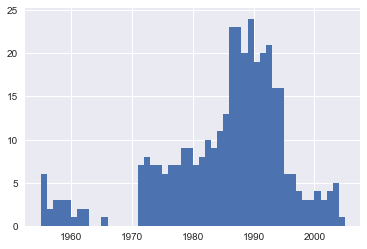

In [32]:
bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], 
                           bins=range(1955, 2006))

This is why we use graphs — as visual creatures, they reveal things to us that we might never catch if we simply looked at tables of numbers.

We can see that no single year has more than 25 missing `profit` values. With 500 data points per year, removing these values would account for less than 4% of the data for the years with the most missing data. 

With the notable exception of the ’90s “grunge era”, most years have fewer than half the missing values of the peak. For our purposes, we’ll say that this is acceptable and remove these rows. We’ll also need to convert the values in the `profit` column from strings (actually, type `object`) to numbers. 

In [35]:
# Remove the rows with non-numeric values in the "profit" column.
cleaned_up_df = df.loc[~non_numeric_profits]

# Convert the values in the "profit" column from strings to numbers.
cleaned_up_df.profit = cleaned_up_df.profit.apply(pd.to_numeric)

Let's make sure it worked:

In [39]:
len(cleaned_up_df)

25131

That’s fewer rows than the original.

Let's check those types again:

In [36]:
cleaned_up_df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

# Let's plot!

In [40]:
group_by_year = cleaned_up_df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

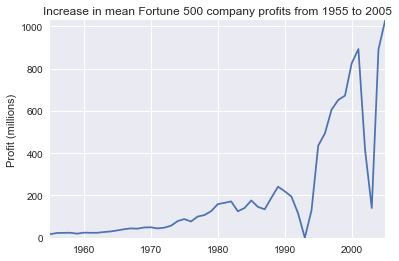

In [41]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

It looks like exponential growth, but with huge dips. They must correspond to the early 1990s recession and the dot-com bubble. It's pretty interesting to see that in the data. 

Note that profits recovered to even higher levels after each dip. Perhaps revenues can tell us more.

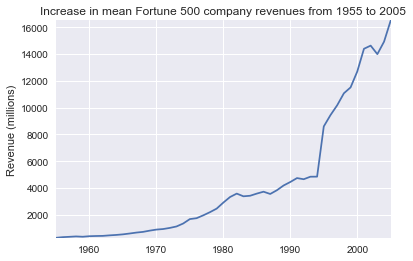

In [42]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

That adds another side to the story. Revenues were no way nearly as badly hit, that's some great accounting work from the finance departments.

Is there a way to superimpose the standard deviations over these profit and revenue graphs?

<img src="img/stack-overflow.jpg">

Stack Overflow to the rescue! There's code that does just that.

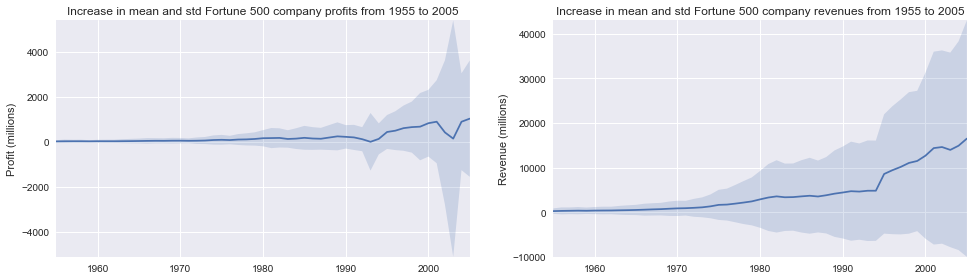

In [43]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

That's staggering, the standard deviations are huge. Some Fortune 500 companies make billions while others lose billions, and the risk has increased along with rising profits over the years. Perhaps some companies perform better than others; are the profits of the top 10% more or less volatile than the bottom 10%?